In [2]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df1=pd.read_csv("/content/Proj2_Test.csv")
df2=pd.read_csv("/content/Proj2_Train.csv")

df=pd.concat([df1,df2])

df.head()

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,Unnamed: 15
0,1,D1,21,G1,30.4,2,0,1,1,0,4,NaN,NaN,1,1,NaN
1,2,D2,24,G1,23.5,2,1,1,1,0,5,NaN,NaN,1,0,NaN
2,3,D3,23,G1,25.7,2,0,0,1,0,3,NaN,NaN,1,1,NaN
3,4,D4,20,G1,27.6,2,0,1,1,0,5,NaN,NaN,1,0,NaN
4,5,D5,25,G1,27.4,2,0,0,1,0,3,NaN,NaN,1,0,NaN


In [45]:
print(df.shape)
df.isnull().sum()

(1100, 16)


Sl No                    0
Sample ID                0
Age                      0
Ob_Score                 0
BMI                      0
Consistency_Score        0
Position_Score           0
Effacement_Score         0
Dialation_Score          0
Station_Score            0
Total_Bishop_Score       0
Cerv_Len_cms           660
Cerv_Wid_cms           660
Induction                0
Del_mode                 0
Unnamed: 15           1100
dtype: int64

In [46]:
df["Cerv_Len_cms"] = df["Cerv_Len_cms"].fillna(df["Cerv_Len_cms"].median())
df["Cerv_Wid_cms"] = df["Cerv_Wid_cms"].fillna(df["Cerv_Wid_cms"].median())

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl No               1100 non-null   int64  
 1   Sample ID           1100 non-null   object 
 2   Age                 1100 non-null   int64  
 3   Ob_Score            1100 non-null   object 
 4   BMI                 1100 non-null   float64
 5   Consistency_Score   1100 non-null   int64  
 6   Position_Score      1100 non-null   int64  
 7   Effacement_Score    1100 non-null   int64  
 8   Dialation_Score     1100 non-null   int64  
 9   Station_Score       1100 non-null   int64  
 10  Total_Bishop_Score  1100 non-null   int64  
 11  Cerv_Len_cms        1100 non-null   float64
 12  Cerv_Wid_cms        1100 non-null   float64
 13  Induction           1100 non-null   int64  
 14  Del_mode            1100 non-null   int64  
 15  Unnamed: 15         0 non-null      float64
dtypes: floa

In [48]:
# Droping the features containing null values more than 40% and unneccessary features
drop_list=["Unnamed: 15","Sample ID","Sl No"]
df.drop(drop_list,inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1100 non-null   int64  
 1   Ob_Score            1100 non-null   object 
 2   BMI                 1100 non-null   float64
 3   Consistency_Score   1100 non-null   int64  
 4   Position_Score      1100 non-null   int64  
 5   Effacement_Score    1100 non-null   int64  
 6   Dialation_Score     1100 non-null   int64  
 7   Station_Score       1100 non-null   int64  
 8   Total_Bishop_Score  1100 non-null   int64  
 9   Cerv_Len_cms        1100 non-null   float64
 10  Cerv_Wid_cms        1100 non-null   float64
 11  Induction           1100 non-null   int64  
 12  Del_mode            1100 non-null   int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 120.3+ KB


In [49]:
#Encoding
dummies=pd.get_dummies(df["Ob_Score"])
merged=pd.concat([df,dummies],axis='columns')
final=merged.drop(["Ob_Score"],axis='columns')
df=final
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1100 non-null   int64  
 1   BMI                 1100 non-null   float64
 2   Consistency_Score   1100 non-null   int64  
 3   Position_Score      1100 non-null   int64  
 4   Effacement_Score    1100 non-null   int64  
 5   Dialation_Score     1100 non-null   int64  
 6   Station_Score       1100 non-null   int64  
 7   Total_Bishop_Score  1100 non-null   int64  
 8   Cerv_Len_cms        1100 non-null   float64
 9   Cerv_Wid_cms        1100 non-null   float64
 10  Induction           1100 non-null   int64  
 11  Del_mode            1100 non-null   int64  
 12  G1                  1100 non-null   uint8  
 13  G2A1                1100 non-null   uint8  
 14  G3A2                1100 non-null   uint8  
dtypes: float64(3), int64(9), uint8(3)
memory usage: 114.9 KB

,Age,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,G1,G2A1,G3A2
Age,1.000000,0.205164,NaN,0.003082,-0.100823,-0.215886,-0.045145,-0.116676,0.299674,-0.175570,-0.130858,-0.160758,-0.068089,0.040999,0.058115
BMI,0.205164,1.000000,NaN,-0.280787,-0.138923,-0.119042,-0.050705,-0.196312,0.104349,-0.126351,-0.279724,0.184233,-0.014493,0.062902,-0.063459
Consistency_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position_Score,0.003082,-0.280787,NaN,1.000000,0.277664,0.148558,0.044260,0.542615,-0.115276,0.169937,0.165395,-0.281460,-0.033692,-0.031552,0.101315
Effacement_Score,-0.100823,-0.138923,NaN,0.277664,1.000000,0.352080,0.214469,0.693766,-0.399631,0.192608,0.054954,-0.118383,-0.020740,0.019815,0.007447
Dialation_Score,-0.215886,-0.119042,NaN,0.148558,0.352080,1.000000,0.089650,0.598323,-0.262834,0.200642,0.062418,-0.000312,0.024078,-0.025649,-0.004943
Station_Score,-0.045145,-0.050705,NaN,0.044260,0.214469,0.089650,1.000000,0.461836,-0.237659,0.079000,-0.018985,-0.082695,-0.054143,0.036644,0.040555
Total_Bishop_Score,-0.116676,-0.196312,NaN,0.542615,0.693766,0.598323,0.461836,1.000000,-0.414191,0.242579,0.113461,-0.213303,0.001090,0.000495,-0.002542
Cerv_Len_cms,0.299674,0.104349,NaN,-0.115276,-0.399631,-0.262834,-0.237659,-0.414191,1.000000,-0.250665,-0.207186,0.220218,-0.010937,-0.006622,0.027822
Cerv_Wid_cms,-0.175570,-0.126351,NaN,0.169937,0.192608,0.200642,0.079000,0.242579,-0.250665,1.000000,0.237388,-0.223905,-0.097624,0.023864,0.132200


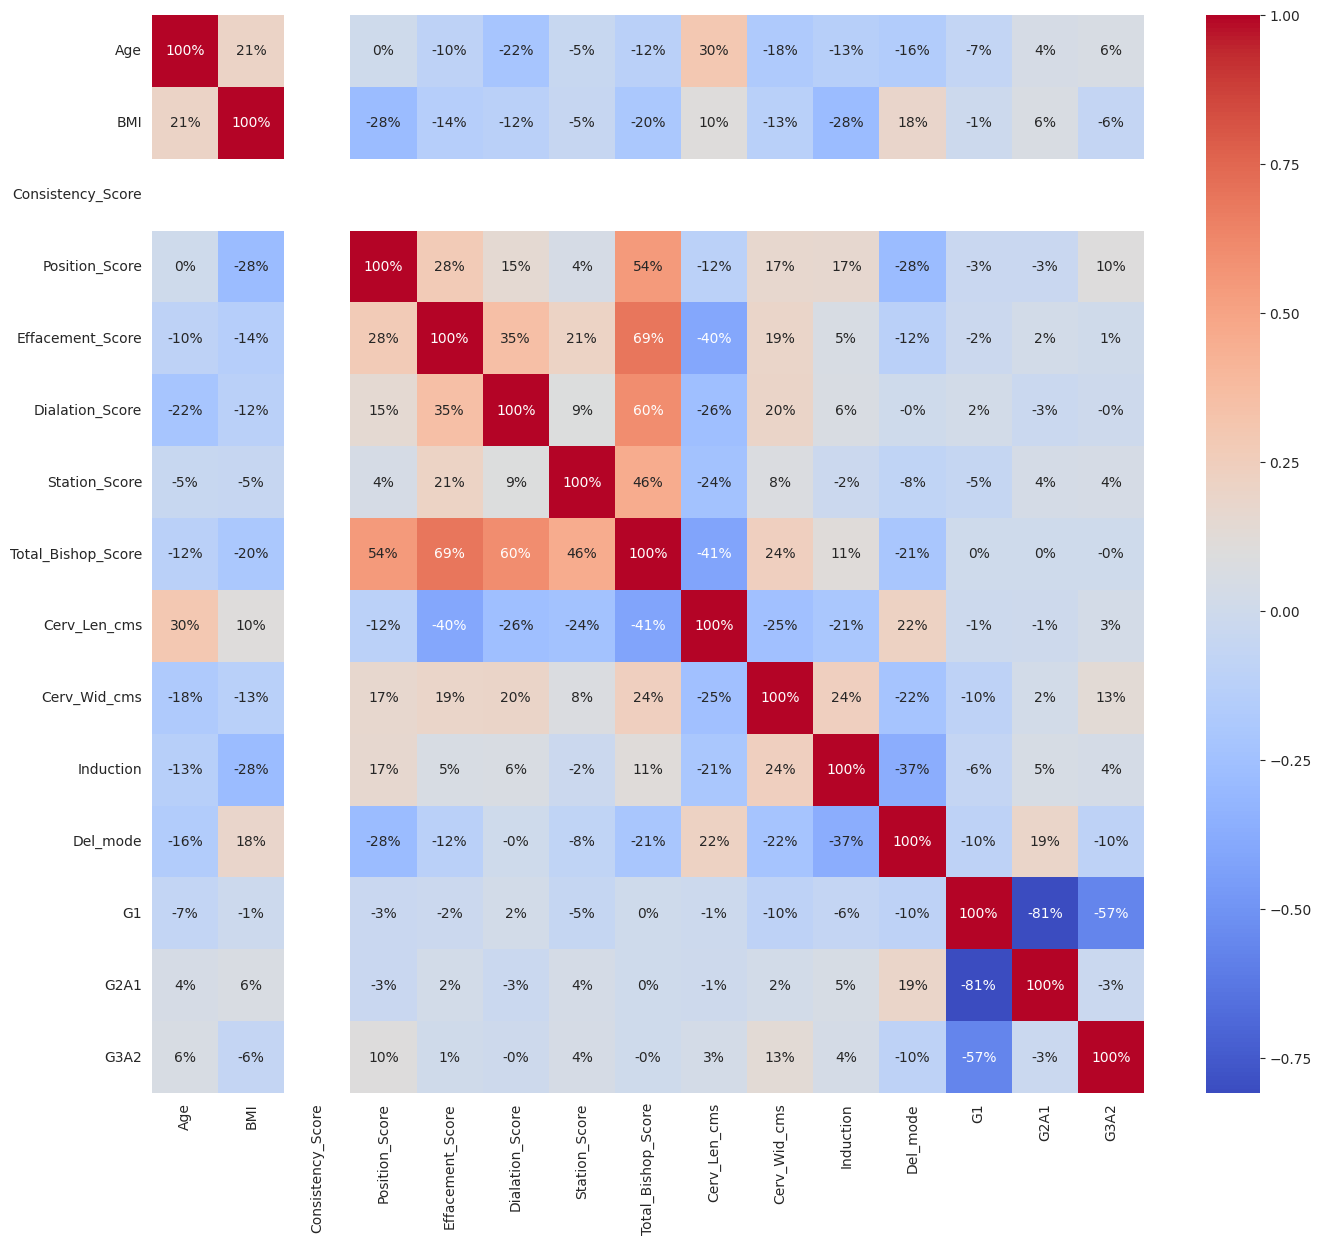

In [50]:
#Checking Co-relation
plt.figure(figsize=(16,14))
matrix=df.corr()
sns.heatmap(matrix,cmap='coolwarm',fmt='.0%',annot=True)
matrix

In [51]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
MS=MinMaxScaler()
df[["Age","BMI","Cerv_Len_cms","Cerv_Wid_cms","Consistency_Score","Total_Bishop_Score"]]=MS.fit_transform(df[["Age","BMI","Cerv_Len_cms","Cerv_Wid_cms","Consistency_Score","Total_Bishop_Score"]])


df.head()

,Age,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,G1,G2A1,G3A2
0,0.214286,0.809160,0.0,0,1,1,0,0.4,0.464452,0.559232,1,1,1,0,0
1,0.428571,0.282443,0.0,1,1,1,0,0.6,0.464452,0.559232,1,0,1,0,0
2,0.357143,0.450382,0.0,0,0,1,0,0.2,0.464452,0.559232,1,1,1,0,0
3,0.142857,0.595420,0.0,0,1,1,0,0.6,0.464452,0.559232,1,0,1,0,0
4,0.500000,0.580153,0.0,0,0,1,0,0.2,0.464452,0.559232,1,0,1,0,0


In [52]:
#Splitting into x & y
X=df.drop("Del_mode",axis=1)
Y=df["Del_mode"]
X.columns

Index(['Age', 'BMI', 'Consistency_Score', 'Position_Score', 'Effacement_Score',
       'Dialation_Score', 'Station_Score', 'Total_Bishop_Score',
       'Cerv_Len_cms', 'Cerv_Wid_cms', 'Induction', 'G1', 'G2A1', 'G3A2'],
      dtype='object')

In [53]:
#Applying K best feature w.r.t Dependent variable
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
Kbest_rank=SelectKBest(score_func=chi2,k=5)
Kbest_feature=Kbest_rank.fit(X,Y)


df_score=pd.DataFrame(Kbest_feature.scores_,columns=['Score'])
df_score
df_columns=pd.DataFrame(X.columns)
df_columns

,0
0,Age
1,BMI
2,Consistency_Score
3,Position_Score
4,Effacement_Score
5,Dialation_Score
6,Station_Score
7,Total_Bishop_Score
8,Cerv_Len_cms
9,Cerv_Wid_cms


In [54]:
#Applying K best feature
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_kbest_rank_feature = SelectKBest(score_func = chi2, k = 5)
kbest_feature = select_kbest_rank_feature.fit(X,Y)
df_score = pd.DataFrame(kbest_feature.scores_,columns = ['Score'])
dfcolumns = pd.DataFrame(X.columns)
kbest_rank_feature_concat = pd.concat([dfcolumns,df_score] , axis = 1)
kbest_rank_feature_concat.columns = ['features','k_score']
kbest_rank_feature_concat

print(kbest_rank_feature_concat.nlargest(10,'k_score'))

              features    k_score
3       Position_Score  42.778690
12                G2A1  37.387868
13                G3A2  10.352941
4     Effacement_Score   9.207943
10           Induction   8.952128
7   Total_Bishop_Score   7.636870
6        Station_Score   5.944853
1                  BMI   2.655086
0                  Age   2.156245
9         Cerv_Wid_cms   1.775595


In [55]:

X.info()

Y.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1100 non-null   float64
 1   BMI                 1100 non-null   float64
 2   Consistency_Score   1100 non-null   float64
 3   Position_Score      1100 non-null   int64  
 4   Effacement_Score    1100 non-null   int64  
 5   Dialation_Score     1100 non-null   int64  
 6   Station_Score       1100 non-null   int64  
 7   Total_Bishop_Score  1100 non-null   float64
 8   Cerv_Len_cms        1100 non-null   float64
 9   Cerv_Wid_cms        1100 non-null   float64
 10  Induction           1100 non-null   int64  
 11  G1                  1100 non-null   uint8  
 12  G2A1                1100 non-null   uint8  
 13  G3A2                1100 non-null   uint8  
dtypes: float64(6), int64(5), uint8(3)
memory usage: 106.3 KB


0    748
1    352
Name: Del_mode, dtype: int64

In [56]:
# Apply SMOTE for oversampling
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
...
# transform the dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

# summarize the new class distribution
counter = Counter(Y)
print(counter)

Y.value_counts()

Counter({1: 748, 0: 748})


1    748
0    748
Name: Del_mode, dtype: int64

train_accuracy score 0.766953199617956
test_accuracy score 0.7639198218262806
Precesion score is  0.79
F1 score is  0.76
 recall  0.72
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       220
           1       0.79      0.72      0.76       229

    accuracy                           0.76       449
   macro avg       0.77      0.76      0.76       449
weighted avg       0.77      0.76      0.76       449



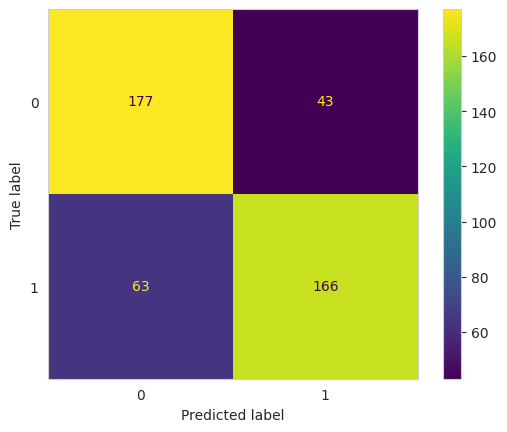

AUC Value 0.8418980265078532


-0.09355836988009306

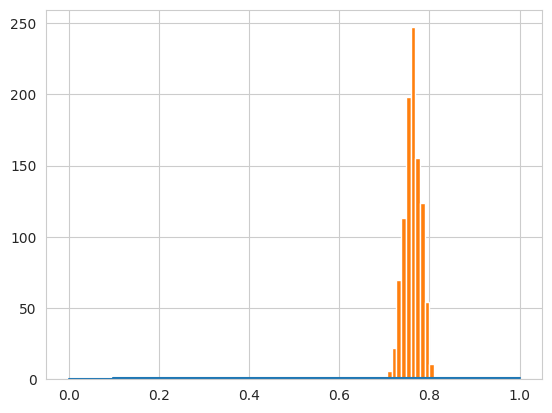

In [57]:
# Model Development
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# perform a logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_train_pred = logreg.predict(X_train)
Y_test_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
Auc_LR = accuracy_score(Y_train , Y_train_pred)
Auc_LR1 = accuracy_score(Y_test , Y_test_pred)

print('train_accuracy score', Auc_LR)
print('test_accuracy score',Auc_LR1)

from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_LR = precision_score(Y_test,Y_test_pred)
f1score_LR = f1_score(Y_test,Y_test_pred)
recall_LR = recall_score(Y_test,Y_test_pred)
print("Precesion score is ",Precesion_LR.round(2))
print("F1 score is ",f1score_LR.round(2))
print(" recall ",recall_LR.round(2))
#check precision,f1-score

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_test_pred))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred)
plt.show()

#ROC curve

from sklearn.metrics import roc_curve,roc_auc_score
logreg.predict_proba(X_train)[:1]
TPR,FPR,Dummy = roc_curve(Y_train,logreg.predict_proba(X_train)[:,1])


import matplotlib.pyplot as plt
plt.plot(TPR,FPR)

#AUC Value
print("AUC Value" ,roc_auc_score(Y_train,logreg.predict_log_proba(X_train)[:,1]))



training_accuracy = []
test_accuracy = []

# Validation set approach to get best results that minimise variance
for i in range(1,1001):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state=i)
    logreg.fit(X_train,Y_train)
    Y_train_pred = logreg.predict(X_train)
    Y_test_pred = logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train, Y_train_pred))
    test_accuracy.append(accuracy_score(Y_test, Y_test_pred))

import numpy as np
np.mean(training_accuracy)
np.mean(test_accuracy)

K1 = pd.DataFrame(test_accuracy)
K1[0].hist()
K1[0].skew()

Training accuracy : 0.9742120343839542
Test accuracy : 0.9465478841870824
Precesion score is  0.94
F1 score is  0.95
 recall  0.96
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       215
           1       0.94      0.96      0.95       234

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



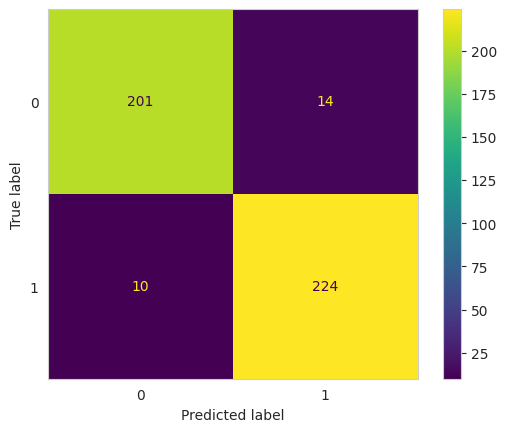

,0,0,0
0,1,1.00,0.97
1,3,0.98,0.96
2,5,0.97,0.95
3,7,0.96,0.95
4,9,0.96,0.94
5,11,0.95,0.94
6,13,0.93,0.93
7,15,0.91,0.92
8,17,0.91,0.92
9,19,0.90,0.89


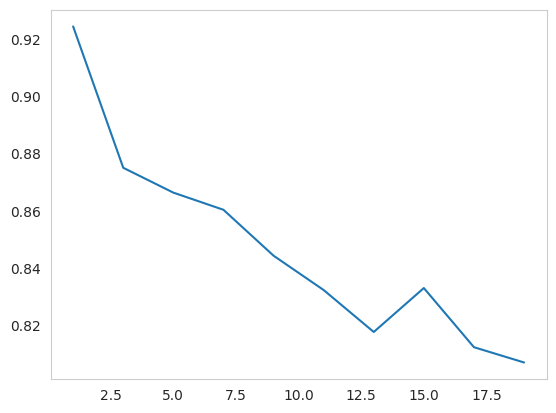

In [59]:
# performing Knn algorithm
pd.set_option("display.max_columns", None)

from sklearn.neighbors import KNeighborsClassifier
KNN =   KNeighborsClassifier(n_neighbors = 5 , p = 1)
KNN.fit(X_train  , Y_train)
Y_Pred_train = KNN.predict(X_train)
Y_Pred_test = KNN.predict(X_test)

from sklearn.metrics import accuracy_score
train_accu_KNN = accuracy_score(Y_train , Y_Pred_train)
test_accu_KNN = accuracy_score(Y_test , Y_Pred_test)

print("Training accuracy :" ,train_accu_KNN)
print("Test accuracy :", test_accu_KNN)


from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_KNN = precision_score(Y_test,Y_Pred_test)
f1score_KNN = f1_score(Y_test,Y_Pred_test)
recall_KNN = recall_score(Y_test,Y_Pred_test)
print("Precesion score is ",Precesion_KNN.round(2))
print("F1 score is ",f1score_KNN.round(2))
print(" recall ",recall_KNN.round(2))





from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_Pred_test))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_Pred_test)
plt.show()



training_accuracy = []
test_accuracy  = []
K_scores=[]
from sklearn.model_selection import cross_val_score

for i in range (1,21,2):
    from sklearn.neighbors import KNeighborsClassifier
    KNN =   KNeighborsClassifier(n_neighbors = i , p = 2)
    KNN.fit(X_train  , Y_train)
    Y_Pred_train = KNN.predict(X_train)
    Y_Pred_test = KNN.predict(X_test)
    scores = cross_val_score(KNN, X,Y, cv=5, scoring='accuracy')
    K_scores.append(scores.mean())
    from sklearn.metrics import accuracy_score
    training_accuracy.append(accuracy_score(Y_train , Y_Pred_train).round(2))
    test_accuracy.append(accuracy_score(Y_test , Y_Pred_test).round(2))

import matplotlib.pyplot as plt
plt.plot(range(1,21,2),K_scores)



pd.DataFrame(range(1,21,2))
pd.DataFrame(training_accuracy)
pd.DataFrame(test_accuracy)

pd.concat([pd.DataFrame(range(1,21,2)),
           pd.DataFrame(training_accuracy),
           pd.DataFrame(test_accuracy)],axis =1)

training_accuracy 0.8691499522445081
test_accuracy 0.8463251670378619
Precesion score is  0.81
F1 score is  0.86
 recall  0.93
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       215
           1       0.81      0.93      0.86       234

    accuracy                           0.85       449
   macro avg       0.86      0.84      0.84       449
weighted avg       0.85      0.85      0.84       449



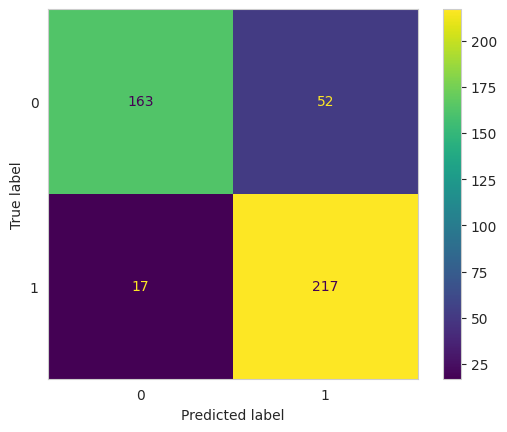

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy score 0.9102196752626552
test accuracy 0.8953229398663697
Precesion score is  0.89
F1 score is  0.9
 recall  0.91
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       215
           1       0.89      0.91      0.90       234

    accuracy                           0.90       449
   macro avg       0.90      0.89      0.90       449
weighted avg       0.90      0.90      0.90       449



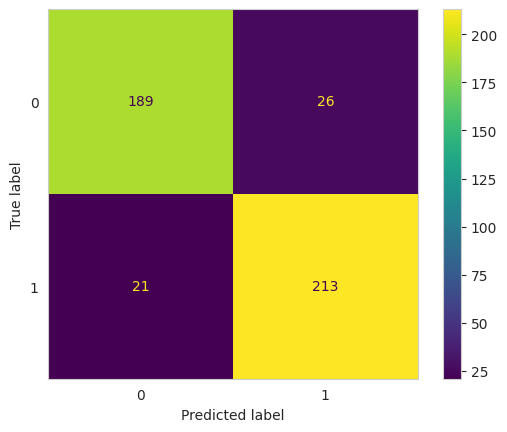

In [60]:

#decision trees

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="gini", max_depth = 6)
DT.fit(X_train,Y_train)
df.dtypes

Y_train_pred = DT.predict(X_train)

Y_test_pred = DT.predict(X_test)

from sklearn.metrics import accuracy_score
AUC_DT = accuracy_score(Y_train, Y_train_pred)
AUC_DT1= accuracy_score(Y_test, Y_test_pred)
print('training_accuracy', AUC_DT)
print('test_accuracy',AUC_DT1)


from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_DT = precision_score(Y_test,Y_test_pred)
f1score_DT = f1_score(Y_test,Y_test_pred)
recall_DT = recall_score(Y_test,Y_test_pred)
print("Precesion score is ",Precesion_DT.round(2))
print("F1 score is ",f1score_DT.round(2))
print(" recall ",recall_DT.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_test_pred))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred)
plt.show()

DT.tree_.max_depth #calculating depth of the tree
DT.tree_.node_count  # calcuating the numbervo

# Bagging
from sklearn.ensemble import BaggingClassifier
DT = DecisionTreeClassifier(max_depth=5)
bag = BaggingClassifier(base_estimator=DT ,max_features=0.5,
                  n_estimators=500,
                  max_samples=0.8,
                  bootstrap= True) #bootstrap means no repeating samples

bag.fit(X_train,Y_train)

Y_pred_tr = bag.predict(X_train)
Y_pred_te = bag.predict(X_test)
from sklearn.metrics import accuracy_score
bag_AC = accuracy_score(Y_train, Y_pred_tr)
print("Accuracy score"  , bag_AC)

bag_AC1 = accuracy_score(Y_test, Y_pred_te)
print("test accuracy" , bag_AC1)

from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_BG = precision_score(Y_test,Y_pred_te)
f1score_BG = f1_score(Y_test,Y_pred_te)
recall_BG = recall_score(Y_test,Y_pred_te)
print("Precesion score is ",Precesion_BG.round(2))
print("F1 score is ",f1score_BG.round(2))
print(" recall ",recall_BG.round(2))



from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pred_te))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_te)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


train accuracy score 0.9188156638013372
test accuracy 0.9020044543429844
Precesion score is  0.9
F1 score is  0.91
 recall  0.92
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       215
           1       0.90      0.92      0.91       234

    accuracy                           0.90       449
   macro avg       0.90      0.90      0.90       449
weighted avg       0.90      0.90      0.90       449



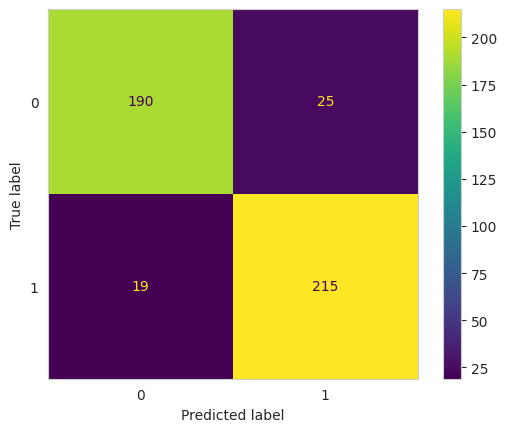

In [61]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
RFR = RandomForestClassifier(max_depth=6,
                  n_estimators=500,
                  max_samples=None,max_features='auto',
                  bootstrap= False,random_state=100) #bootstrap means no repeating samples

RFR.fit(X_train,Y_train)

Y_pred_train = RFR.predict(X_train)
Y_pred_tes = RFR.predict(X_test)
from sklearn.metrics import accuracy_score
RFR_acc = accuracy_score(Y_train, Y_pred_train)
print("train accuracy score"  ,RFR_acc )

RFR_ACC1 = accuracy_score(Y_test, Y_pred_tes)
print("test accuracy" ,RFR_ACC1)


from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_RFR = precision_score(Y_test,Y_pred_tes)
f1score_RFR = f1_score(Y_test,Y_pred_tes)
recall_RFR = recall_score(Y_test,Y_pred_tes)
print("Precesion score is ",Precesion_RFR.round(2))
print("F1 score is ",f1score_RFR.round(2))
print(" recall ",recall_RFR.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pred_tes))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_tes)
plt.show()


Training Accuracy 0.8844317096466093
Test Accuracy 0.8552338530066815
Precesion score is  0.85
F1 score is  0.86
 recall  0.88
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       215
           1       0.85      0.88      0.86       234

    accuracy                           0.86       449
   macro avg       0.86      0.85      0.85       449
weighted avg       0.86      0.86      0.86       449



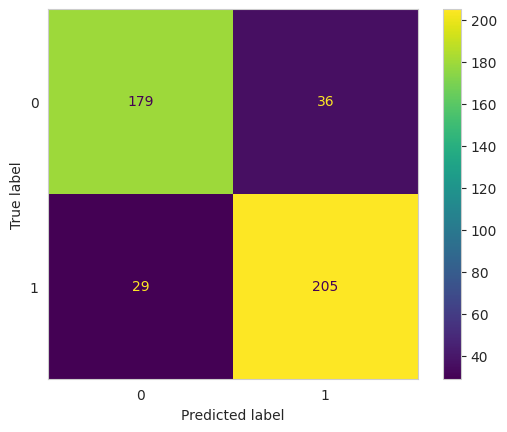

In [62]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier()
ADB.fit(X_train, Y_train)

Y_pred_train = ADB.predict(X_train)
Y_pred_test = ADB.predict(X_test)



Auc_ADB = accuracy_score(Y_train, Y_pred_train)
Auc_ADB1 = accuracy_score(Y_test, Y_pred_test)

print("Training Accuracy" , Auc_ADB )
print("Test Accuracy" , Auc_ADB1 )

from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_ADB = precision_score(Y_test,Y_pred_test)
f1score_ADB = f1_score(Y_test,Y_pred_test)
recall_ADB = recall_score(Y_test,Y_pred_test)
print("Precesion score is ",Precesion_ADB.round(2))
print("F1 score is ",f1score_ADB.round(2))
print(" recall ",recall_ADB.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pred_test))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_test)
plt.show()




Train_accuracy_score 0.6790830945558739
Test_accuracy_score 0.688195991091314
Precesion score is  0.71
F1 score is  0.69
 recall  0.68
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       215
           1       0.71      0.68      0.69       234

    accuracy                           0.69       449
   macro avg       0.69      0.69      0.69       449
weighted avg       0.69      0.69      0.69       449



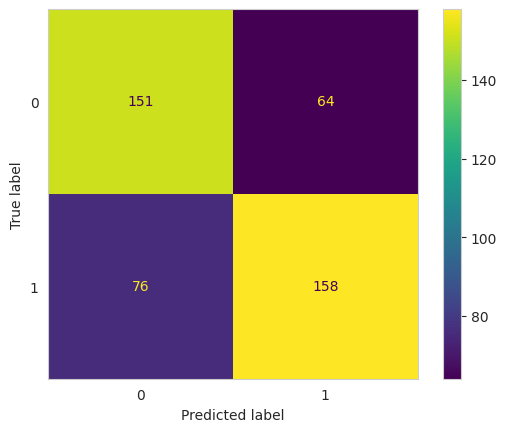

In [63]:
# model fi1tting

from sklearn.naive_bayes import MultinomialNB
Multi = MultinomialNB()
Multi.fit(X_train,Y_train)

Y_pre_train = Multi.predict(X_train)
Y_pre_test = Multi.predict(X_test)


from sklearn.metrics import accuracy_score
Train_acc_score_naive = accuracy_score(Y_train, Y_pre_train)
Test_acc_score_naive = accuracy_score(Y_test, Y_pre_test)

print('Train_accuracy_score', Train_acc_score_naive)
print('Test_accuracy_score' , Test_acc_score_naive)

from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_naive = precision_score(Y_test,Y_pre_test)
f1score_naive = f1_score(Y_test,Y_pre_test)
recall_naive = recall_score(Y_test,Y_pre_test)
print("Precesion score is ",Precesion_naive.round(2))
print("F1 score is ",f1score_naive.round(2))
print(" recall ",recall_naive.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pre_test))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pre_test)
plt.show()

Training Accuracy 1.0
Test Accuracy 0.9621380846325167
Precesion score is  0.95
F1 score is  0.96
 recall  0.98
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       215
           1       0.95      0.98      0.96       234

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



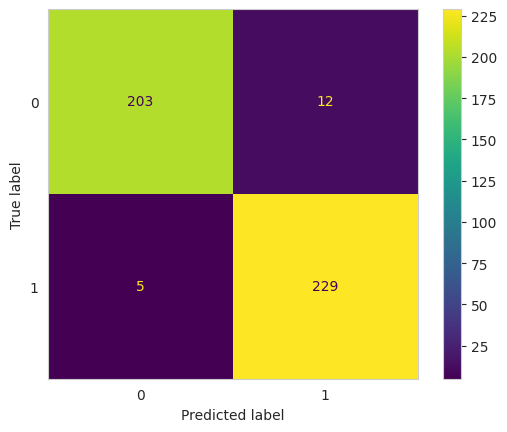

In [64]:
#XGboost

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, Y_train)
xg = XGBClassifier()
xg.fit(X_train, Y_train)
Y_pred_train_ = xg.predict(X_train)
Y_pred_test_ = xg.predict(X_test)



Auc_XG = accuracy_score(Y_train, Y_pred_train_)
Auc_XG1 = accuracy_score(Y_test, Y_pred_test_)

print("Training Accuracy" , Auc_XG )
print("Test Accuracy" , Auc_XG1 )


from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_XG = precision_score(Y_test,Y_pred_test_)
f1score_XG = f1_score(Y_test,Y_pred_test_)
recall_XG = recall_score(Y_test,Y_pred_test_)
print("Precesion score is ",Precesion_XG.round(2))
print("F1 score is ",f1score_XG.round(2))
print(" recall ",recall_XG.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pred_test_))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_test_)
plt.show()

In [65]:
#Making a dataframe of all the scores for every model
scores = [("Logistic Regression",Auc_LR1, f1score_LR,Precesion_LR,recall_LR),
           ("Decision Tree",AUC_DT1,f1score_DT,Precesion_DT,recall_DT),
           ("Random Forest",RFR_ACC1, f1score_RFR,Precesion_RFR,recall_RFR),
           ("KNN", test_accu_KNN, f1score_KNN,Precesion_KNN,recall_KNN),
           ("naive", test_accu_KNN, f1score_naive,Precesion_naive,recall_naive),
           ('Bagging',bag_AC1, f1score_BG,Precesion_BG,recall_BG),
           ('AdaBoost Classifier',Auc_ADB1, f1score_ADB,Precesion_ADB,recall_ADB),
           ('XGBoost Classfier',Auc_XG1, f1score_XG,Precesion_XG,recall_XG)]

Scores =pd.DataFrame(data = scores, columns=['Model Name','Test Accuracy','F1 Score', 'Precision', 'Recall'])
Scores.set_index('Model Name', inplace = True)
Scores.style.background_gradient(cmap='YlGn')
Scores


,Test Accuracy,F1 Score,Precision,Recall
Model Name,,,,
Logistic Regression,0.763920,0.757991,0.794258,0.724891
Decision Tree,0.846325,0.862823,0.806691,0.927350
Random Forest,0.902004,0.907173,0.895833,0.918803
KNN,0.946548,0.949153,0.941176,0.957265
naive,0.946548,0.692982,0.711712,0.675214
Bagging,0.895323,0.900634,0.891213,0.910256
AdaBoost Classifier,0.855234,0.863158,0.850622,0.876068
XGBoost Classfier,0.962138,0.964211,0.950207,0.978632
